In [1]:
import numpy as np
import pandas as pd
from tortreinador.utils.plot import plot_line_2
from tortreinador.utils.preprocessing import load_data
from tortreinador.train import TorchTrainer
from tortreinador.models.MDN import mdn, Mixture, NLLLoss
from tortreinador.utils.View import init_weights, split_weights
from tortreinador.utils.metrics import r2_score
import torch
import torch.nn as nn
import joblib
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib
import matplotlib.pyplot as plt
import proplot as pplt

In [2]:
df_GG = pd.read_excel('D:\\Resource\\Gas_Giants_Core_Earth20W.xlsx')
df_GG['M_total (M_E)'] = df_GG['Mcore (M_J/10^3)'] + df_GG['Menv (M_E)']

In [3]:
input_parameters = [
    'Mass (M_J)',
    'Radius (R_E)',
    'T_sur (K)',
]

output_parameters = [
    'M_total (M_E)',
    'T_int (K)',
    'P_CEB (Mbar)',
    'T_CEB (K)'
]

In [4]:
t_loader, v_loader, t_x, t_y, m_x, m_y = load_data(df_GG, input_parameters, output_parameters, batch_size=256)

In [5]:
trainer = TorchTrainer(epoch=200)

Batch size: 512, Epoch:200, is GPU: True


In [6]:
model = mdn(len(input_parameters), len(output_parameters), 20, 512)
init_weights(model)
criterion = NLLLoss()
pdf = Mixture()
optim = torch.optim.Adam(split_weights(model), lr=0.001, weight_decay=0.001)

In [7]:
t_l, v_l, val_r2, train_r2, mse = trainer.fit_for_MDN(t_loader, v_loader, criterion, model=model, mixture=pdf, model_save_path='D:\\Resource\\MDN\\GrainExoModel\\', optim=optim, best_r2=0.8, lr_milestones=[10, 40, 60, 110, 140, 160], gamma=0.7, warmup_epoch=10)

module.root_layer.0.weight : torch.Size([512, 3])
module.root_layer.0.bias : torch.Size([512])
module.root_layer.2.weight : torch.Size([512, 512])
module.root_layer.2.bias : torch.Size([512])
module.root_layer.4.weight : torch.Size([512, 512])
module.root_layer.4.bias : torch.Size([512])
module.pi.0.weight : torch.Size([512, 512])
module.pi.0.bias : torch.Size([512])
module.pi.2.weight : torch.Size([20, 512])
module.pi.2.bias : torch.Size([20])
module.mu.0.weight : torch.Size([512, 512])
module.mu.0.bias : torch.Size([512])
module.mu.2.weight : torch.Size([80, 512])
module.mu.2.bias : torch.Size([80])
module.sigma.0.weight : torch.Size([512, 512])
module.sigma.0.bias : torch.Size([512])
module.sigma.2.weight : torch.Size([80, 512])
module.sigma.2.bias : torch.Size([80])


  0%|          | 0/625 [00:00<?, ?batch/s]E:\anaconda\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Epoch 6 Validating: 100%|██████████| 79/79 [00:02<00:00, 37.67batch/s, loss=-13.2319, loss_avg=-12.8727, mse=0.0081, r2=0.8546] 


Save Best model: R2:0.8546, Loss Avg:-12.8727


Epoch 7 Validating: 100%|██████████| 79/79 [00:02<00:00, 36.66batch/s, loss=-15.3588, loss_avg=-14.9395, mse=0.0016, r2=0.9124]


Save Best model: R2:0.9124, Loss Avg:-14.9395


Epoch 8 Validating: 100%|██████████| 79/79 [00:02<00:00, 37.77batch/s, loss=-14.1613, loss_avg=-13.3017, mse=0.0010, r2=0.9246]


Save Best model: R2:0.9246, Loss Avg:-13.3017


Epoch 12 Validating: 100%|██████████| 79/79 [00:02<00:00, 34.95batch/s, loss=-17.1003, loss_avg=-16.7518, mse=0.0005, r2=0.9533]


Save Best model: R2:0.9533, Loss Avg:-16.7518


Epoch 17 Validating: 100%|██████████| 79/79 [00:02<00:00, 37.44batch/s, loss=-17.9487, loss_avg=-17.5058, mse=0.0004, r2=0.9582]


Save Best model: R2:0.9582, Loss Avg:-17.5058


Epoch 19 Validating: 100%|██████████| 79/79 [00:02<00:00, 37.66batch/s, loss=-18.4280, loss_avg=-18.1012, mse=0.0007, r2=0.9623]


Save Best model: R2:0.9623, Loss Avg:-18.1012


Epoch 21 Validating: 100%|██████████| 79/79 [00:02<00:00, 37.39batch/s, loss=-18.4782, loss_avg=-18.0196, mse=0.0007, r2=0.9729]


Save Best model: R2:0.9729, Loss Avg:-18.0196


Epoch 27 Validating: 100%|██████████| 79/79 [00:02<00:00, 36.79batch/s, loss=-18.8075, loss_avg=-18.8463, mse=0.0005, r2=0.9765]


Save Best model: R2:0.9765, Loss Avg:-18.8463


Epoch 33 Validating: 100%|██████████| 79/79 [00:02<00:00, 37.36batch/s, loss=-18.5124, loss_avg=-18.5646, mse=0.0006, r2=0.9820]


Save Best model: R2:0.9820, Loss Avg:-18.5646


Epoch 41 Validating: 100%|██████████| 79/79 [00:02<00:00, 37.82batch/s, loss=-19.2062, loss_avg=-19.1929, mse=0.0006, r2=0.9835]


Save Best model: R2:0.9835, Loss Avg:-19.1929


Epoch 49 Validating: 100%|██████████| 79/79 [00:02<00:00, 37.23batch/s, loss=-19.4436, loss_avg=-19.3787, mse=0.0005, r2=0.9837]


Save Best model: R2:0.9837, Loss Avg:-19.3787


Epoch 51 Validating: 100%|██████████| 79/79 [00:02<00:00, 37.11batch/s, loss=-19.8373, loss_avg=-19.6547, mse=0.0005, r2=0.9842]


Save Best model: R2:0.9842, Loss Avg:-19.6547


Epoch 54 Validating: 100%|██████████| 79/79 [00:02<00:00, 35.90batch/s, loss=-19.3524, loss_avg=-19.3976, mse=0.0006, r2=0.9845]


Save Best model: R2:0.9845, Loss Avg:-19.3976


Epoch 56 Validating: 100%|██████████| 79/79 [00:02<00:00, 36.86batch/s, loss=-19.8553, loss_avg=-19.7949, mse=0.0006, r2=0.9847]


Save Best model: R2:0.9847, Loss Avg:-19.7949


Epoch 57 Validating: 100%|██████████| 79/79 [00:02<00:00, 36.98batch/s, loss=-19.7999, loss_avg=-19.7078, mse=0.0003, r2=0.9850]


Save Best model: R2:0.9850, Loss Avg:-19.7078


Epoch 65 Validating: 100%|██████████| 79/79 [00:02<00:00, 36.15batch/s, loss=-19.8374, loss_avg=-19.8799, mse=0.0005, r2=0.9853]


Save Best model: R2:0.9853, Loss Avg:-19.8799


Epoch 71 Validating: 100%|██████████| 79/79 [00:02<00:00, 36.74batch/s, loss=-20.2090, loss_avg=-20.1021, mse=0.0004, r2=0.9856]


Save Best model: R2:0.9856, Loss Avg:-20.1021


Epoch 73 Validating: 100%|██████████| 79/79 [00:02<00:00, 38.63batch/s, loss=-20.0438, loss_avg=-19.9921, mse=0.0007, r2=0.9857]


Save Best model: R2:0.9857, Loss Avg:-19.9921


Epoch 92 Validating: 100%|██████████| 79/79 [00:02<00:00, 36.39batch/s, loss=-20.4408, loss_avg=-20.5612, mse=0.0003, r2=0.9858]


Save Best model: R2:0.9858, Loss Avg:-20.5612


Epoch 108 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.47batch/s, loss=-20.3901, loss_avg=-20.5395, mse=0.0007, r2=0.9860]


Save Best model: R2:0.9860, Loss Avg:-20.5395


Epoch 114 Validating: 100%|██████████| 79/79 [00:02<00:00, 30.61batch/s, loss=-20.4995, loss_avg=-20.6681, mse=0.0005, r2=0.9861]


Save Best model: R2:0.9861, Loss Avg:-20.6681


Epoch 120 Validating: 100%|██████████| 79/79 [00:02<00:00, 32.57batch/s, loss=-20.2395, loss_avg=-20.3017, mse=0.0006, r2=0.9862]


Save Best model: R2:0.9862, Loss Avg:-20.3017


Epoch 124 Validating: 100%|██████████| 79/79 [00:02<00:00, 37.12batch/s, loss=-20.7014, loss_avg=-20.9692, mse=0.0004, r2=0.9865]


Save Best model: R2:0.9865, Loss Avg:-20.9692


Epoch 141 Validating: 100%|██████████| 79/79 [00:02<00:00, 37.87batch/s, loss=-21.3893, loss_avg=-21.4629, mse=0.0003, r2=0.9866]


Save Best model: R2:0.9866, Loss Avg:-21.4629


Epoch 192 Validating: 100%|██████████| 79/79 [00:02<00:00, 37.55batch/s, loss=-21.9415, loss_avg=-22.0344, mse=0.0004, r2=0.9866]


Save Best model: R2:0.9866, Loss Avg:-22.0344


Epoch 200 Validating: 100%|██████████| 79/79 [00:02<00:00, 37.64batch/s, loss=-22.1137, loss_avg=-22.1864, mse=0.0005, r2=0.9859] 


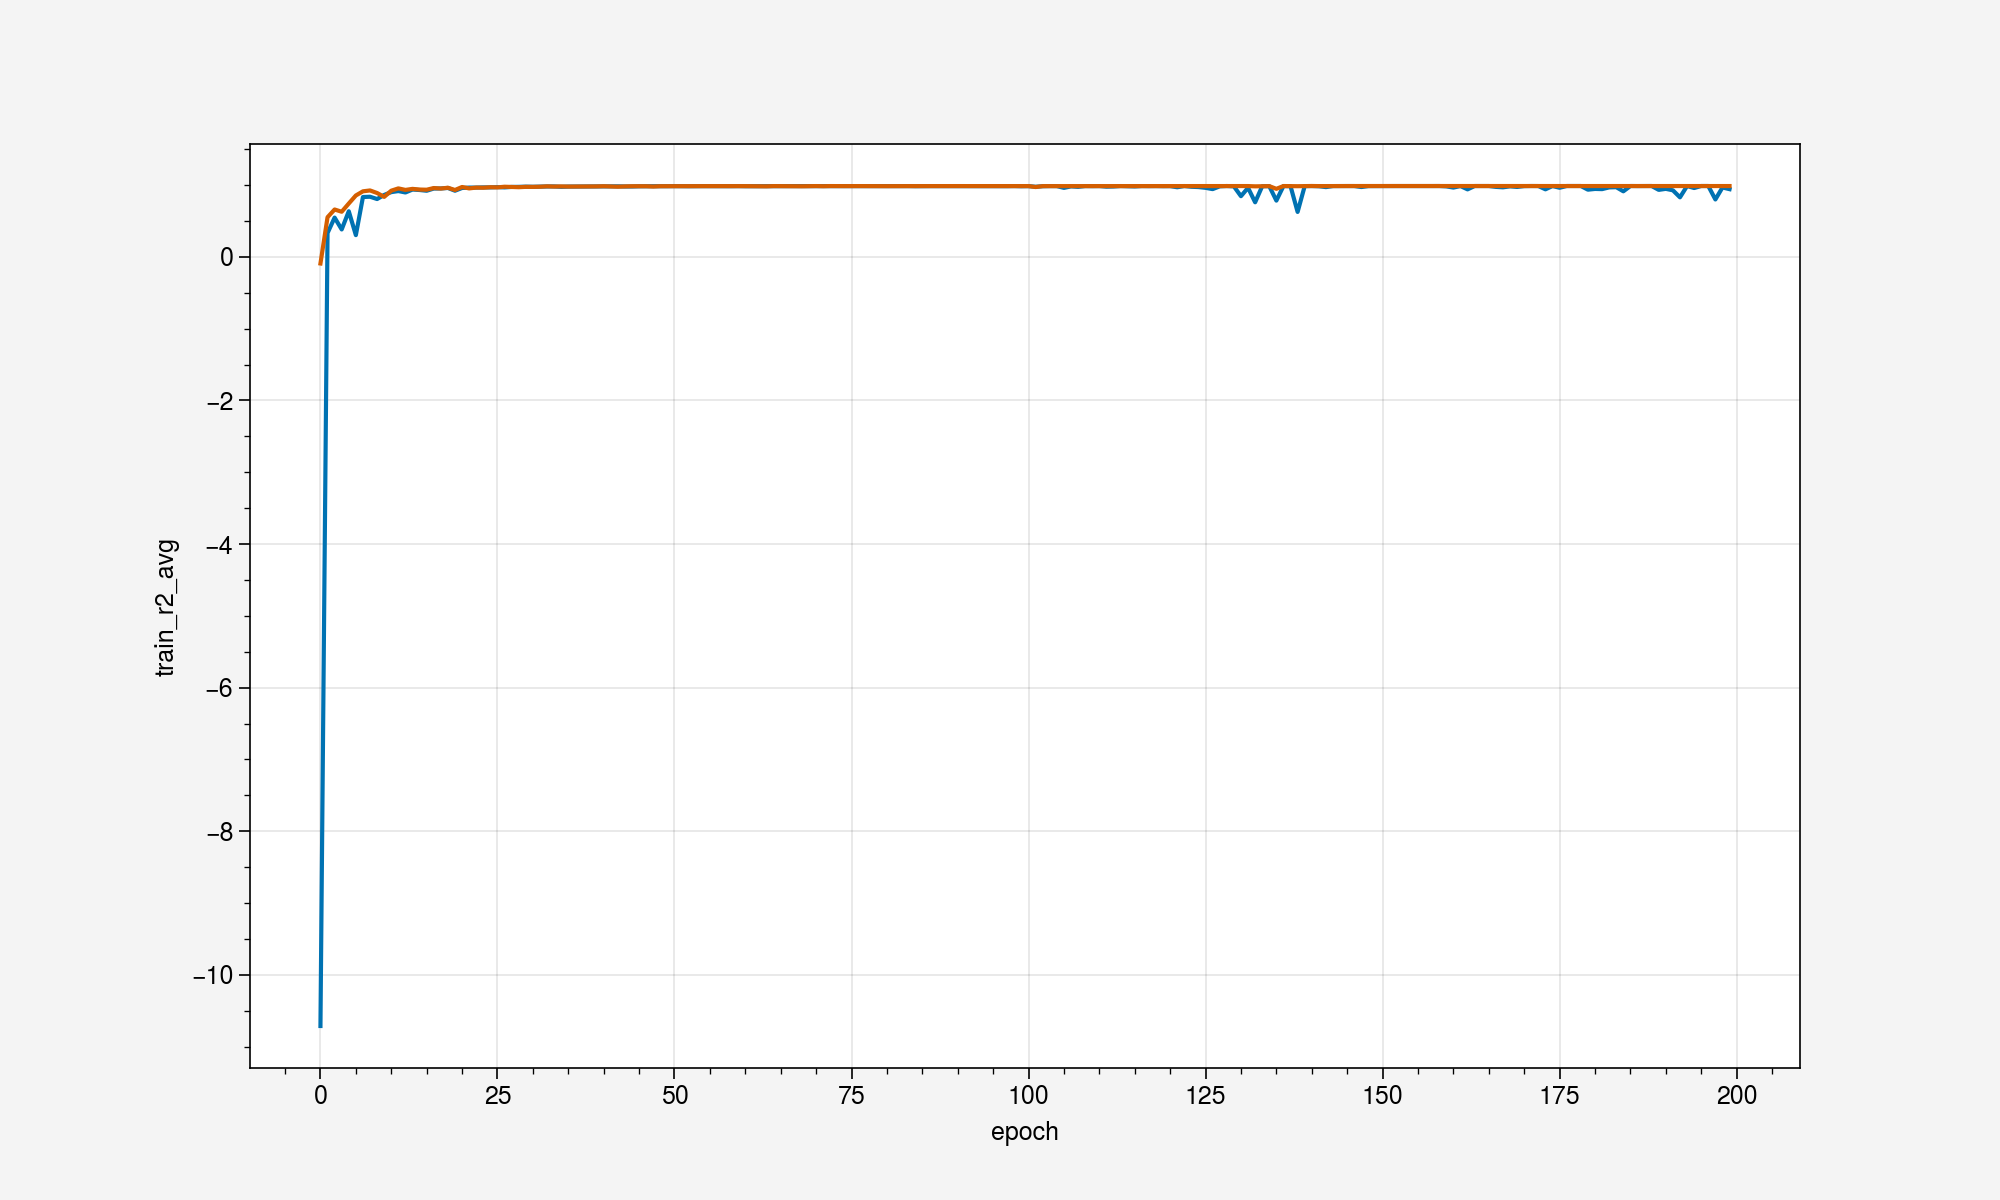

In [8]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(200)
result_pd['train_r2_avg'] = train_r2
result_pd['val_r2_avg'] = val_r2

plot_line_2(y_1='train_r2_avg', y_2='val_r2_avg', df=result_pd, fig_size=(10, 6), output_path=".\\imgs\\GasGiants_MDN20240116_TrainValR2_2.png", dpi=300)

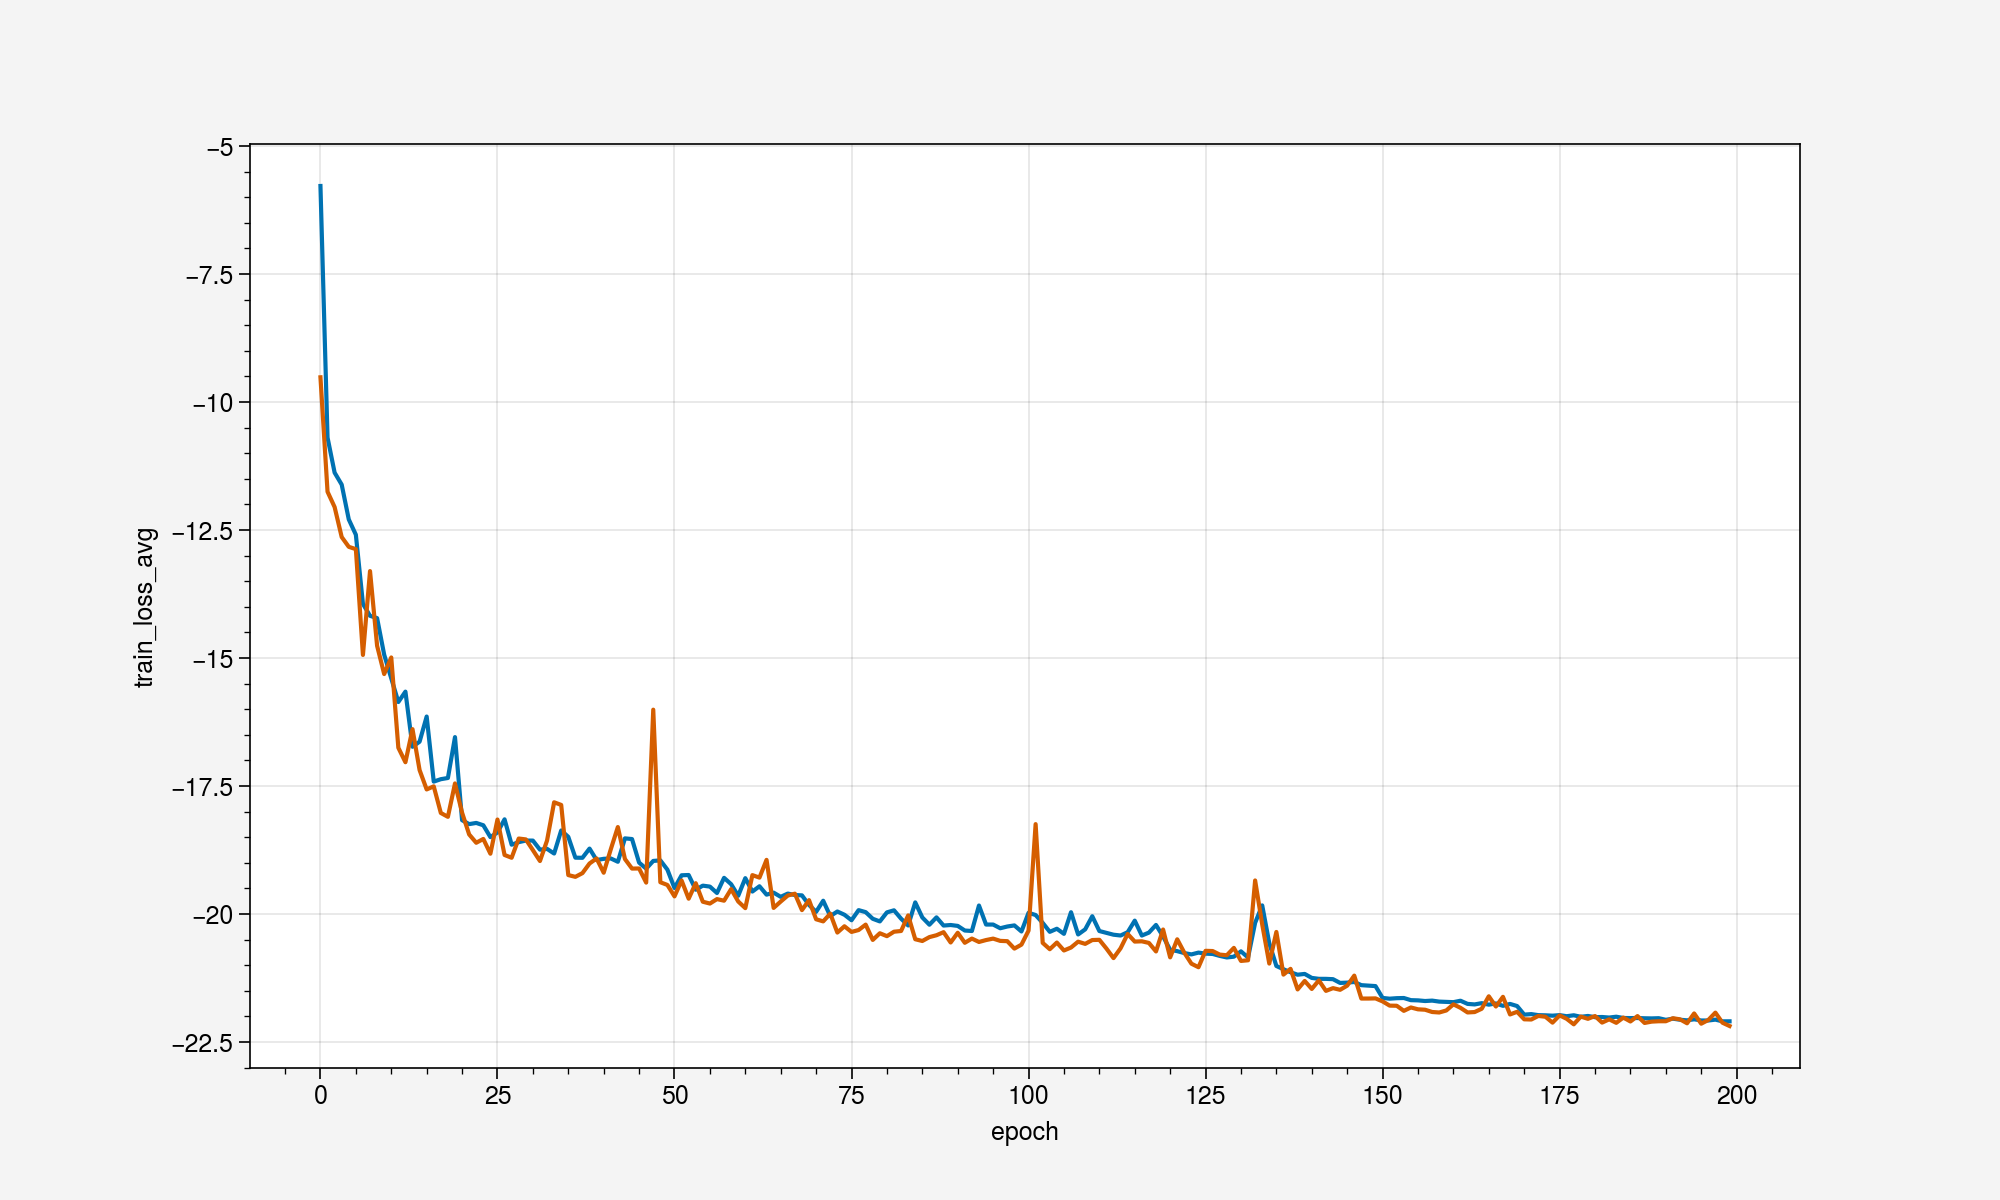

In [13]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(len(t_l))
result_pd['train_loss_avg'] = t_l
result_pd['validation_loss_avg'] = v_l

plot_line_2(y_1='train_loss_avg', y_2='validation_loss_avg', df=result_pd, output_path=".\\imgs\\GasGiants_MDN20240116_TrainValLoss_2.png")

In [10]:
r2_distance = np.abs((np.array(train_r2) - np.array(val_r2)).mean())
loss_distance = np.abs((np.array(t_l) - np.array(v_l)).mean())
loss_dis_df = pd.DataFrame(np.abs(np.array(t_l) - np.array(v_l))).iloc[10:, :]
max_dis_10 = loss_dis_df.sort_values(by=0, ascending=False).iloc[:10, :].sort_index()

In [11]:
np.save('D:\\Resource\\MDN\\TestData\\GasGiantExo\\test_x.npy', t_x)
np.save('D:\\Resource\\MDN\\TestData\\GasGiantExo\\test_y.npy', t_y)
np.save('D:\\Resource\\MDN\\TestData\\GasGiantExo\\scaler_x.npy', m_x)
np.save('D:\\Resource\\MDN\\TestData\\GasGiantExo\\scaler_y.npy', m_y)
joblib.dump(m_x, "D:\\Resource\\MDN\\TestData\\GasGiantExo\\MDN_v3_Xscaler_20231201.save")
joblib.dump(m_y, "D:\\Resource\\MDN\\TestData\\GasGiantExo\\MDN_v3_yscaler_20231201.save")

['D:\\Resource\\MDN\\TestData\\GasGiantExo\\MDN_v3_yscaler_20231201.save']

In [12]:
model.eval()
# Predict
pi, mu, sigma = model(t_x.to('cuda'))
mix = Mixture()
criterion = NLLLoss()
mse = nn.MSELoss()
sample = mix(pi, mu, sigma).sample()
t_y = t_y.to('cuda')
print("NLLLoss: {}, MSE: {}, R2: {}".format(criterion(pi, mu, sigma, t_y),
                                            mse(t_y, sample),
                                            r2_score(sample, t_y)))

NLLLoss: -22.178643018654647, MSE: 0.0005092629554598376, R2: 0.9860200433431483


In [18]:
pi_exp = torch.exp(pi)
mu_np = mu.detach().cpu().numpy()
sigma_np = sigma.detach().cpu().numpy()
pi_np = pi_exp.detach().cpu().numpy()

y_label = np.arange(0, 1, 0.001).reshape(-1, 1)
y_label_ = y_label[:, np.newaxis, np.newaxis, :]
idx_select = np.random.choice(range(0, len(mu_np)), 20000)
mu_sub = mu_np[idx_select]
sigma_sub = sigma_np[idx_select]
pi_sub = pi_np[idx_select]
mu_sub_T = np.transpose(mu_sub, (0, 2, 1))
sigma_sub_T = np.transpose(sigma_sub, (0, 2, 1))

# Example: shape(1000, 6, 100, 10) 1000 data, 6 type, 100 rows with 10 columns every type
exponent = np.exp(
    -1 / 2 * np.square(np.transpose((y_label_ - mu_sub_T), (1, 2, 0, 3)) / sigma_sub_T[:, :, np.newaxis, :]))
factors = 1 / math.sqrt(2 * math.pi) / sigma_sub_T[:, :, np.newaxis, :]
GMM_PDF = np.sum(pi_sub[:, np.newaxis, np.newaxis, :] * factors * exponent, axis=-1)
MM = MinMaxScaler()
GMM_PDF = GMM_PDF.reshape(GMM_PDF.shape[0] * GMM_PDF.shape[1], GMM_PDF.shape[-1]).transpose((-1, 0))
# f = e.transpose((-1, 0))
GMM_PDF_scaled = MM.fit_transform(GMM_PDF)
# t_y = t_y.detach().cpu().numpy()



In [19]:
test_y_inverse = m_y.inverse_transform(t_y.detach().cpu().numpy())
test_y_inverse_sub = test_y_inverse[idx_select]

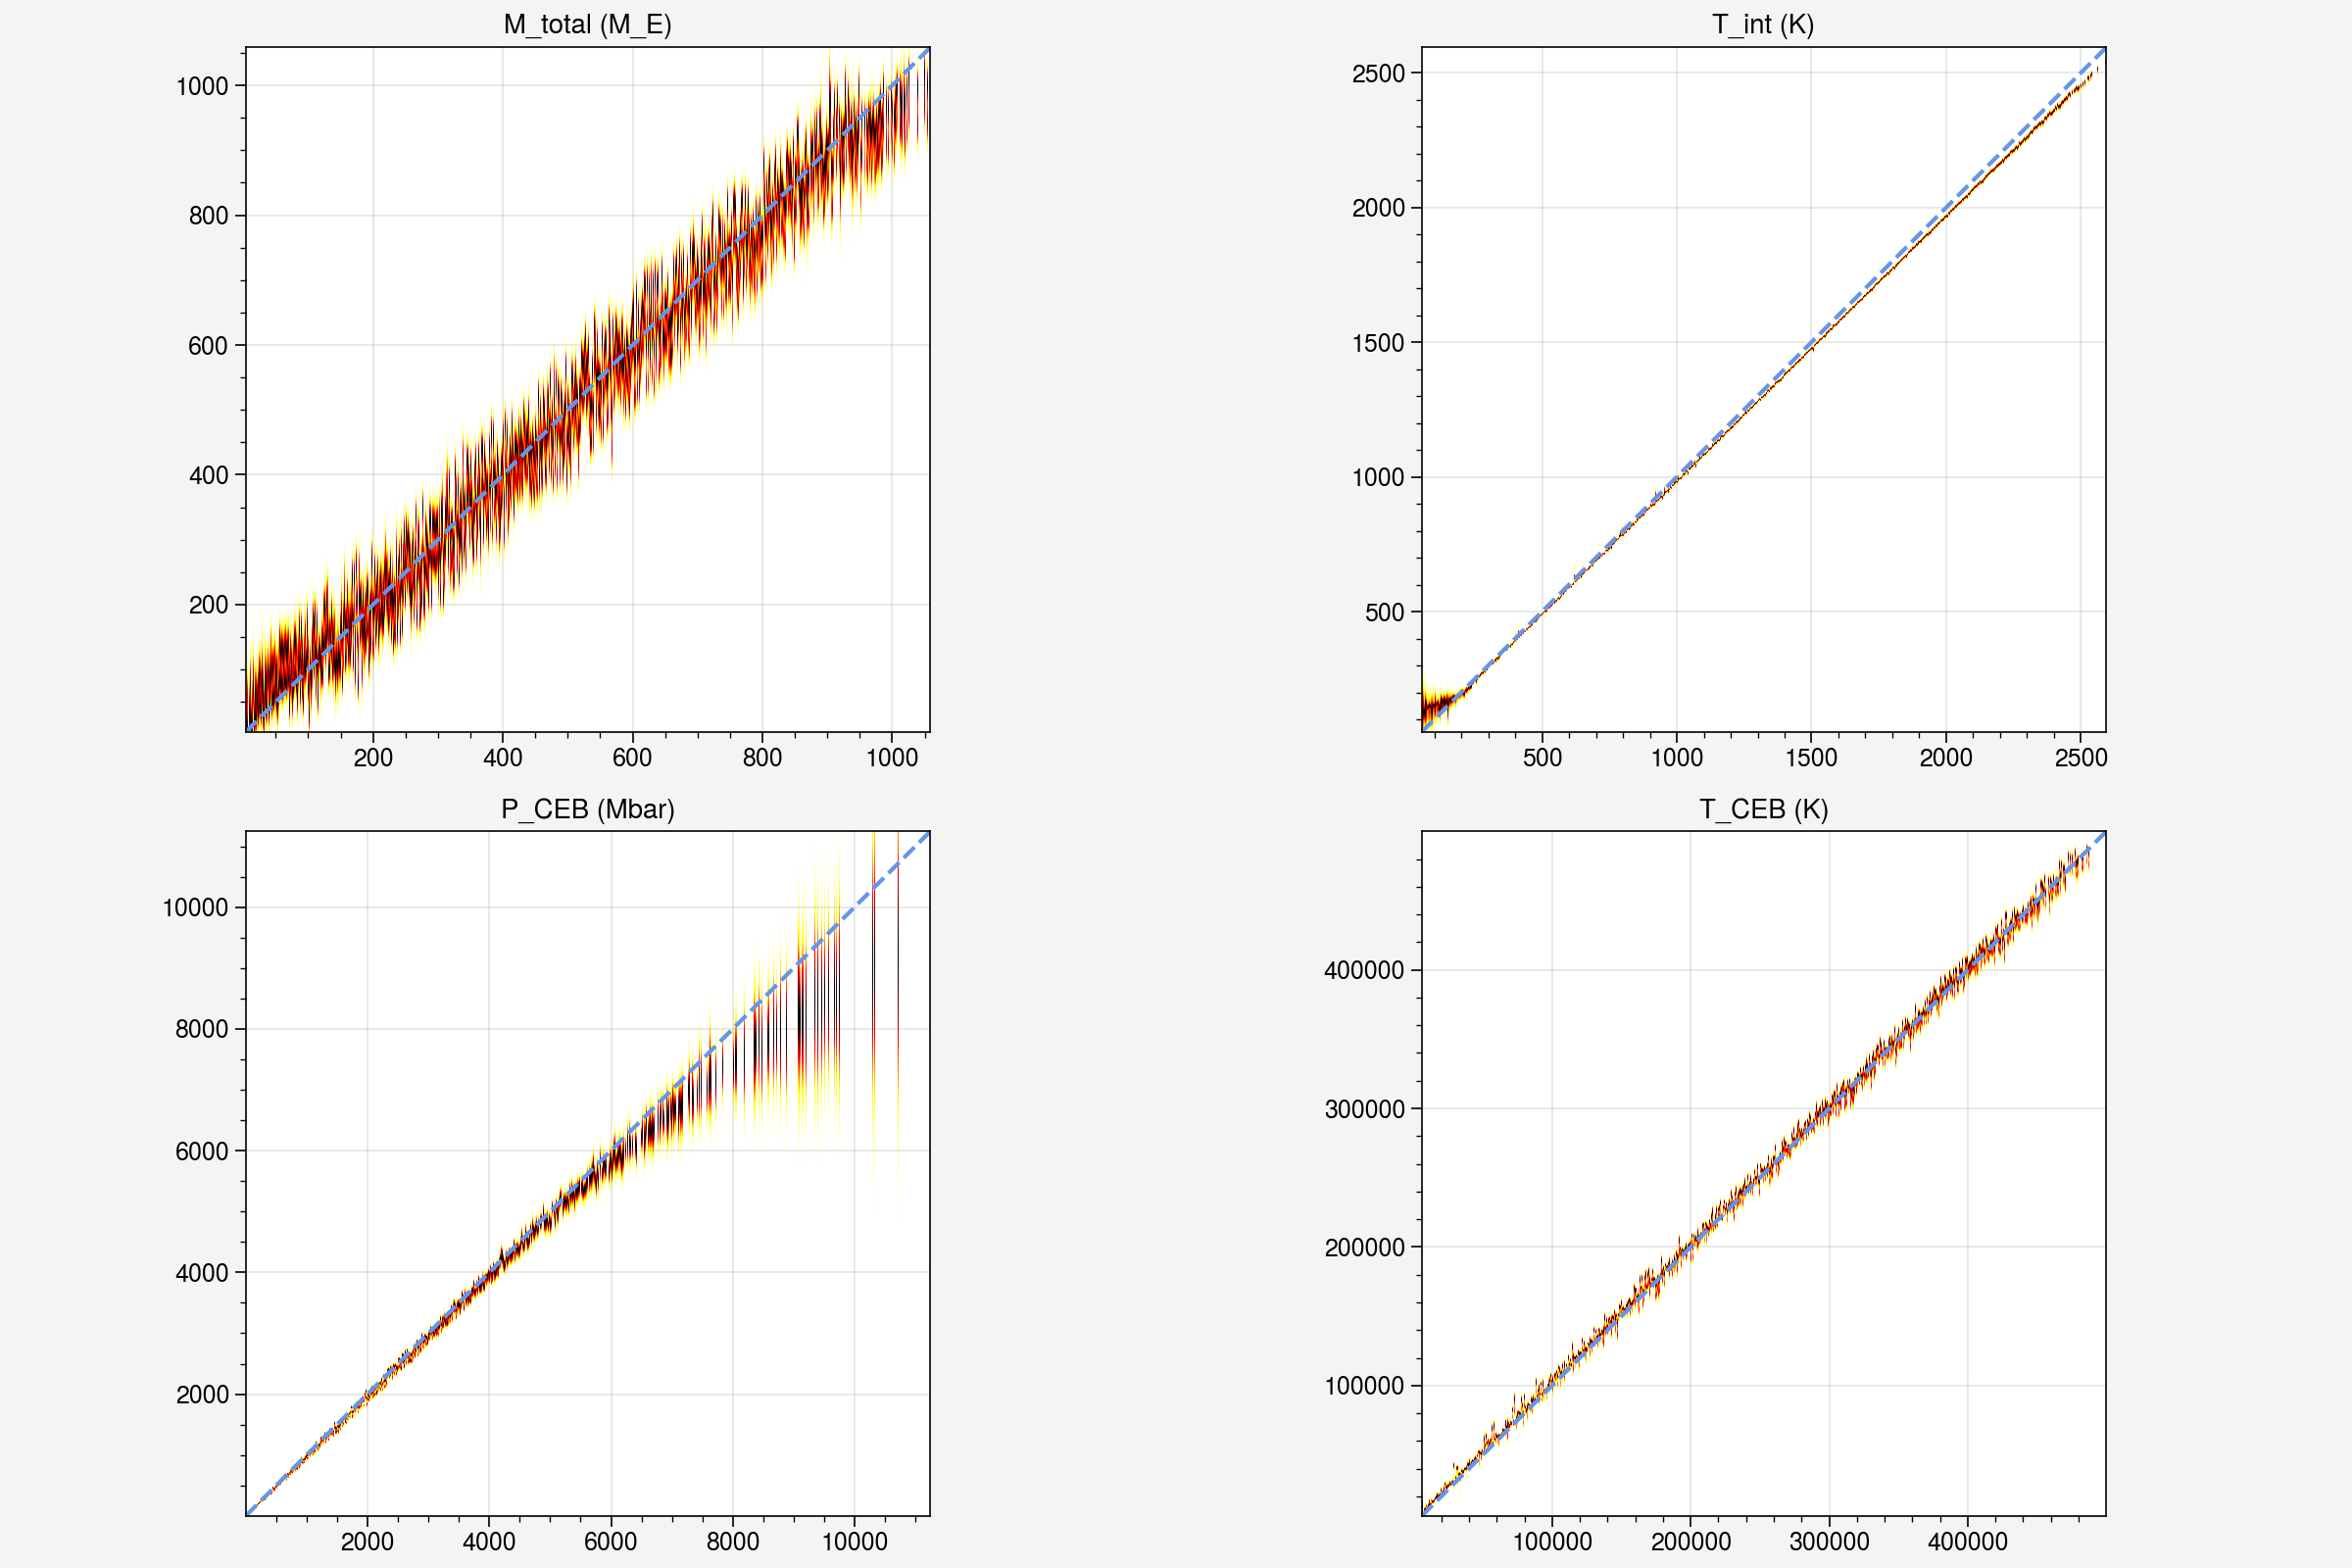

In [21]:
cmap = plt.cm.hot_r
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
fig, axs = pplt.subplots(
#     figsize=(4,4),
    nrows=2, ncols=2,
    share=False, 
    figsize=(12, 8)
#     tight=True,
)

input_parameters = [
    'Mass (M_J)',
    'Radius (R_E)',
    'T_sur (K)',
]

output_parameters = [
    'M_total (M_E)',
    'T_int (K)',
    'P_CEB (Mbar)',
    'T_CEB (K)'
]

xlocators = [
    200, 500, 2000, 100000
]
xminorlocators = [
    0.004, 0.02, 0.02, 0.02, 40, 100, 0.04, 0.004
]

OUTPUT_DIMS = len(output_parameters)

for o in range(OUTPUT_DIMS):
    y_max = max(test_y_inverse_sub[:, o])
    y_min = min(test_y_inverse_sub[:, o])
    for i in range(0, GMM_PDF_scaled.shape[-1], OUTPUT_DIMS):
        tx, ty = [test_y_inverse_sub[int(i / OUTPUT_DIMS), o], y_min]
        axs[o].imshow(
                GMM_PDF_scaled[:, o + i].reshape(-1, 1),
                cmap=cmap,
                norm=norm,
                origin='lower',
                extent=(tx, tx + 0.0001, ty, y_max)
            )

    axs[o].plot([y_min, y_max], [y_min, y_max], c='cornflowerblue', ls='--')
    axs[o].format(
        xlim=(y_min, y_max), ylim=(y_min, y_max), title=output_parameters[o], 
        # xlabel=output_parameters[o], 
        xlocator=xlocators[o]
        # ylocator=xlocators[o], yminorlocator=xminorlocators[o]
    )

In [22]:
fig.save('D:\\PythonProject\\RebuildProject\\Rock\\imgs\\prediction_GasGiantExoplanet_20240117.png')

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
sns.set_style('white')

In [35]:
def plot_line_2(y_1: str, y_2: str, df: pd.DataFrame, output_path: str, fig_size: tuple = (10, 6), dpi: int = 300):
    """
    Plot Merge Line (2 Lines) using Seaborn
    :param y_1: Name of Line 1
    :param y_2: Name of Line 2
    :param df: Dataframe
    :param fig_size:
    :param output_path:
    :param dpi:
    :return: Show Line picture and save to the specific location
    """
    fig = plt.figure(figsize=fig_size)
    sns.lineplot(x='epoch', y=y_1, data=df)
    sns.lineplot(x='epoch', y=y_2, data=df)
    plt.show()
    fig.savefig(output_path, dpi=dpi)


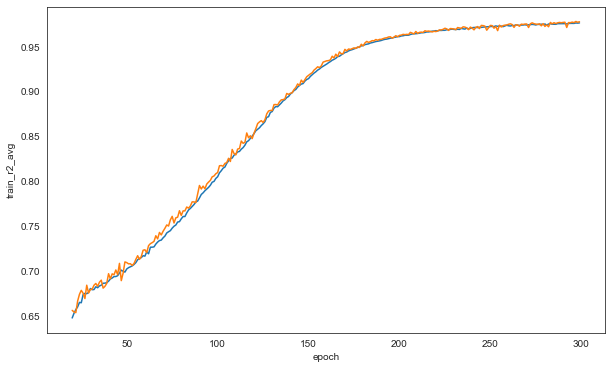

In [33]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(300)
result_pd['train_r2_avg'] = train_r2
result_pd['val_r2_avg'] = val_r2

plot_line_2(y_1='train_r2_avg', y_2='val_r2_avg', df=result_pd.iloc[20:, :], fig_size=(10, 6), output_path=".\\imgs\\GasGiants_MDN20231118_TrainValR2.png", dpi=300)

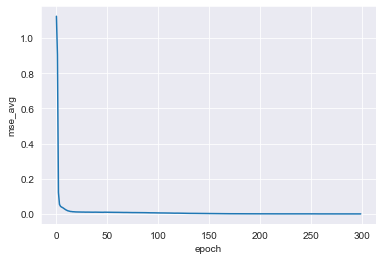

In [8]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(300)
result_pd['mse_avg'] = mse
sns.lineplot(x='epoch', y='mse_avg', data=result_pd)
plt.show()

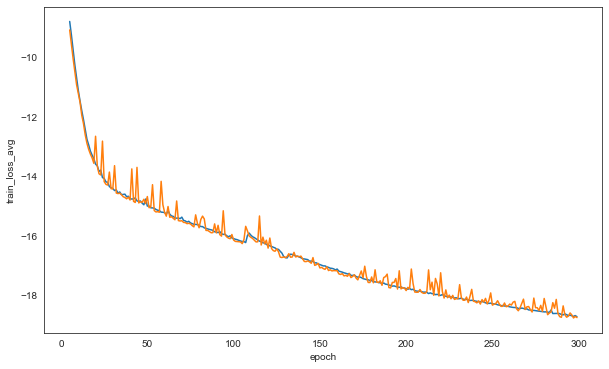

In [36]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(300)
result_pd['train_loss_avg'] = t_l
result_pd['validation_loss_avg'] = v_l

plot_line_2(y_1='train_loss_avg', y_2='validation_loss_avg', df=result_pd.iloc[5:, :], output_path=".\\imgs\\GasGiants_MDN20231118_TrainValLoss.png")

In [9]:
r2_distance = np.abs((np.array(train_r2) - np.array(val_r2)).mean())
loss_distance = np.abs((np.array(t_l) - np.array(v_l)).mean())
# loss_distance = np.abs(t_l[-1] - v_l[-1])

In [39]:
test_x_np = test_x.numpy()
test_y_np = test_y.numpy()

In [40]:
np.save('D:\\Resource\\MDN\\TestData\\test_x.npy', test_x_np)
np.save('D:\\Resource\\MDN\\TestData\\test_y.npy', test_y_np)
np.save('D:\\Resource\\MDN\\TestData\\scaler_x.npy', s_x)
np.save('D:\\Resource\\MDN\\TestData\\scaler_y.npy', s_y)